In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
df = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]

In [18]:
print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [19]:
print(df.shape)

(28, 9)


In [20]:
df_new = df.replace("—", np.nan)
df_new.head(10)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [21]:
print(df_new.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [22]:
df_new[['2014', '2019']] = df_new[['2014', '2019']].apply(pd.to_numeric)
print(df_new.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [23]:
print(df_new.isnull().sum() / len(df))

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [24]:
df_without_last_row = df.drop(index=27)
df_without_last_row = df_without_last_row.iloc[: -1]
print(df_without_last_row)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [25]:
for col in df_new.columns[1:]:
    df_new[col] = df_new[col].fillna(df_new[col].mean()).round(1)
print(df_new.head(10))

              Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0               Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.1   8.0
1          Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2          Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3   Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4           Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   8.0
5        Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6       Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7         Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8  Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9           Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0


In [26]:
highest_birth_rate_2014_region = df_new[df_new['2019'] == df_new['2019'].max()]['Регіон']
print("Регіон з найвищою народжуваністю у 2019 році:")
print(highest_birth_rate_2014_region)

Регіон з найвищою народжуваністю у 2019 році:
25    Київ
Name: Регіон, dtype: object


In [27]:
df_new.keys()

Index(['Регіон', '1950', '1960', '1970', '1990', '2000', '2012', '2014',
       '2019'],
      dtype='object')

In [28]:
avrg_ukr_rate = df_new.drop(columns = "Регіон").mean().round(3)["2019"]

print("mean_Ukraine: ", avrg_ukr_rate, "\n")

above_avarage_2019 = df_new[df_new["2019"] > avrg_ukr_rate]['Регіон']
print("Regions from 2019 which meet the target: ")
above_avarage_2019

mean_Ukraine:  8.018 

Regions from 2019 which meet the target: 


,Регіон
2,Волинська
6,Закарпатська
8,Івано-Франківська
12,Львівська
14,Одеська
16,Рівненська
20,Херсонська
23,Чернівецька
25,Київ
27,Україна


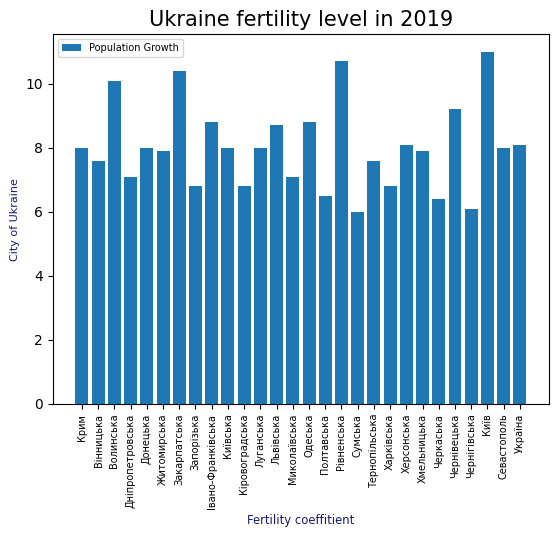

In [29]:
import matplotlib.pyplot as plt

plt.bar(df_new.iloc[:, 0], df_new["2019"], label="Population Growth")
plt.xlabel("Fertility coeffitient", fontsize="small", color="midnightblue")
plt.ylabel("City of Ukraine", fontsize="8", color="midnightblue")
plt.title("Ukraine fertility level in 2019", fontsize=15, color="black")
plt.legend(fontsize = "7")
plt.xticks(rotation=90, fontsize="7")
plt.show()
